# Fligths Delay
## by Gilvan Reis

## Preliminary Wrangling

This document explores a dataset containing informations about flights delays during the year of 2019. The data was collected [here](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E). Each record is an operation that is identified by one carrier operating in one airport during a specific month of a year.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from pywaffle import Waffle
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/2019_airline_delay_causes.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 20946 non-null  int64  
 1    month               20946 non-null  int64  
 2   carrier              20946 non-null  object 
 3   carrier_name         20946 non-null  object 
 4   airport              20946 non-null  object 
 5   airport_name         20946 non-null  object 
 6   arr_flights          20932 non-null  float64
 7   arr_del15            20927 non-null  float64
 8   carrier_ct           20932 non-null  float64
 9    weather_ct          20932 non-null  float64
 10  nas_ct               20932 non-null  float64
 11  security_ct          20932 non-null  float64
 12  late_aircraft_ct     20932 non-null  float64
 13  arr_cancelled        20932 non-null  float64
 14  arr_diverted         20932 non-null  float64
 15   arr_delay           20932 non-null 

In [4]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,20946.0,20946.000000,20932.000000,20927.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,20932.000000,0.0
mean,2019.0,6.548124,354.578492,66.385674,18.529209,2.212045,20.996112,0.126231,24.506268,6.445872,0.901968,4581.010940,1402.300783,252.364848,1100.938945,6.377030,1819.029333,NaN
std,0.0,3.454813,994.222826,177.396659,44.285872,6.821045,67.444734,0.545841,68.196091,26.798972,3.937406,13349.726176,3859.290938,903.289207,4239.372921,40.753285,5278.977954,NaN
min,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.0,4.000000,48.000000,7.000000,2.130000,0.000000,1.320000,0.000000,2.000000,0.000000,0.000000,402.750000,115.000000,0.000000,48.000000,0.000000,114.000000,NaN
50%,2019.0,7.000000,93.000000,18.000000,5.990000,0.530000,4.260000,0.000000,6.180000,1.000000,0.000000,1154.000000,380.000000,24.000000,166.000000,0.000000,422.000000,NaN
75%,2019.0,10.000000,237.000000,46.000000,15.062500,1.930000,11.990000,0.000000,16.740000,4.000000,1.000000,3100.250000,1085.000000,169.000000,513.000000,0.000000,1257.000000,NaN
max,2019.0,12.000000,21873.000000,3714.000000,966.330000,175.560000,1485.820000,12.510000,1429.550000,933.000000,115.000000,329847.000000,97970.000000,23749.000000,97283.000000,3194.000000,125086.000000,NaN


Based in those statistics we can see the following quality issues that can be cleaned:
- Strip columns names
- Remove 'Unnamed: 21' column
- Fill 5 missing 'arr_del15' records with 0
- Remove 14 NaN records
- Convert columns to int
- Split 'airport_name' information in 'airport_city', 'airport_state', and 'airport_name'

In [5]:
# Strip columns names
df.rename(columns=lambda column: column.strip(), inplace=True)

df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [6]:
# Remove 'Unnamed: 21' column
df.drop(columns='Unnamed: 21', inplace=True)

df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [7]:
# Fill missing 'arr_del15' records with 0
df.arr_del15.fillna(0, inplace=True)

df.arr_del15.isna().sum()

0

In [8]:
# Remove NaN records
df.dropna(subset=['arr_flights'], inplace=True)

df.shape

(20932, 21)

In [9]:
# Convert columns to int
df = df.convert_dtypes()

df.dtypes

year                     Int64
month                    Int64
carrier                 string
carrier_name            string
airport                 string
airport_name            string
arr_flights              Int64
arr_del15                Int64
carrier_ct             Float64
weather_ct             Float64
nas_ct                 Float64
security_ct            Float64
late_aircraft_ct       Float64
arr_cancelled            Int64
arr_diverted             Int64
arr_delay                Int64
carrier_delay            Int64
weather_delay            Int64
nas_delay                Int64
security_delay           Int64
late_aircraft_delay      Int64
dtype: object

In [10]:
# Split 'airport_name' information in 'airport_city', 'airport_state', and 'airport_name'
df[['airport_city', 'airport_state', 'airport_name']] = df.airport_name.str.extract(r'(.*), (.*): (.*)')

df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,airport_city,airport_state
0,2019,1,MQ,Envoy Air,SAV,Savannah/Hilton Head International,65,15,3.41,0.71,...,1,1,601,180,29,129,0,263,Savannah,GA
1,2019,1,MQ,Envoy Air,SDF,Louisville Muhammad Ali International,61,18,2.7,1.01,...,1,0,890,180,36,383,0,291,Louisville,KY
2,2019,1,MQ,Envoy Air,SGF,Springfield-Branson National,428,80,13.31,5.18,...,15,0,3954,705,213,982,0,2054,Springfield,MO
3,2019,1,MQ,Envoy Air,SHV,Shreveport Regional,174,28,5.97,1.17,...,0,0,1655,360,55,268,0,972,Shreveport,LA
4,2019,1,MQ,Envoy Air,SJT,San Angelo Regional/Mathis Field,135,23,10.78,0.35,...,2,0,835,320,27,192,0,296,San Angelo,TX


In [41]:
df.carrier.nunique()

17

### What is the structure of your dataset?

There are 20932 records with 23 features with most of them being numeric. Below there is a glossary about the columns in the dataset:

- carrier: Airline code.
- carrier_name: Airline name.
- airport: Airport code.
- airport_name: Airport name.
- airport_city: Airport city name.
- airport_state: Airport state abbreviation.
- arr_flights: Number of flights which arrived at the airport.
- arr_del15: Number of flights delayed (>= 15minutes late).
- carrier_ct: Proportion of delayed flights due to air carrier (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- weather_ct: Proportion of delayed flights due to extreme weather.
- nas_ct: Proportion of delayed flights due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control).
- security_ct: Proportion of delayed flights due to security (e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas).
- late_aircraft_ct: Proportion of delayed flights due to a previous flight using the same aircraft being late.
- arr_cancelled: Number of cancelled flights.
- arr_diverted: Number of diverted flights.
- arr_delay: Total time (minutes) of delayed flights.
- carrier_delay: Total time (minutes) of delayed flights due to air carrier.
- weather_delay: Total time (minutes) of delayed flights due to weather.
- nas_delay: Total time (minutes) of delayed flights due to National Aviation System.
- security_delay: Total time (minutes) of delayed flights due to security.
- late_aircraft_delay: Total time (minutes) of delayed flights due to a previous flight using the same aircraft being late.

### What is/are the main feature(s) of interest in your dataset?

I am interested in figuring out how flights delays are related to the others features in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that \*\_ct features give me what is the main cause of fligths delay. I also expect to find which airport_name, carrier_name, and month has more delays number and total delay time.

## Univariate Exploration
Let's start looking at the distrution of arr_del15.

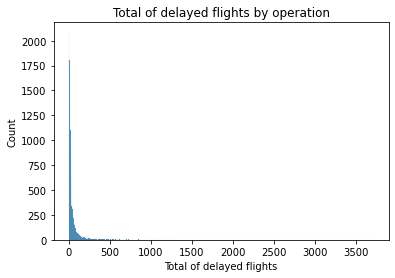

In [11]:
sns.histplot(x=df.arr_del15);
plt.title('Total of delayed flights by operation')
plt.xlabel('Total of delayed flights');

In [12]:
df.arr_del15.describe()

count    20932.000000
mean        66.369817
std        177.378436
min          0.000000
25%          7.000000
50%         18.000000
75%         46.000000
max       3714.000000
Name: arr_del15, dtype: float64

We can see that only 25% of over 20k operations have more than 46 delay. Because there is a long tail, let's check this plot using a log scale.

In [13]:
# def calculate_bins(values, binsize):
#     """Calculate bins of values over a linear scale."""
#     return np.arange(values.min(), values.max() + binsize, binsize)
    
def calculate_log_bins(values, binsize):
    """Calculate bins of values over a logarithm scale."""
    return 10 ** np.arange(values.min(), np.log10(values.max()) + binsize, binsize)

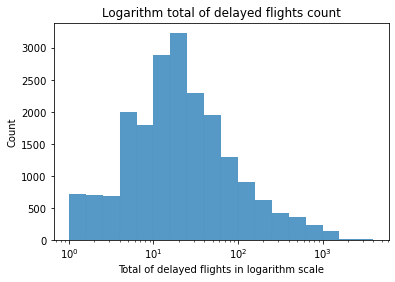

In [14]:
sns.histplot(x=df.arr_del15, bins=calculate_log_bins(df.arr_del15, 0.2));
plt.xscale('log');
# adjust tick label
plt.title('Logarithm total of delayed flights count')
plt.xlabel('Total of delayed flights in logarithm scale');

As expected, we can see the peak of records around 16. The distribution is skewed to right.

Let's check the distribution of delay causes.

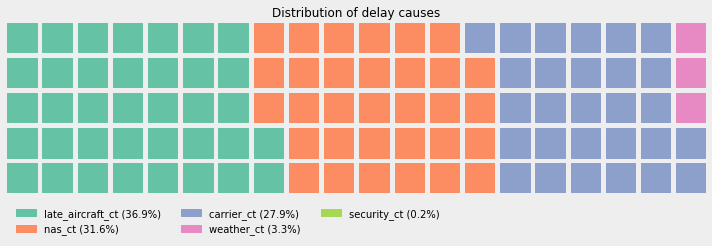

In [15]:
data = df.sum()
data = data[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']] / data.arr_del15 * 100
data.sort_values(ascending=False, inplace=True)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data.apply(round),
    title={'label': 'Distribution of delay causes'},
    labels=["{} ({:.1f}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left','bbox_to_anchor': (0, -0.3), 'ncol': 3 , 'framealpha': 0},
    figsize=(10, 6)
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')

We can see that, in general, the main cause of delay was due to a previous flight using the same aircraft being late. Flights delayed due to security problems are very uncommon.

Let's check the distribution of operations by month

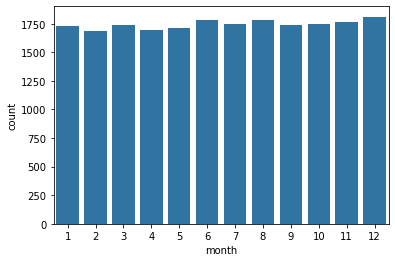

In [16]:
sns_color = sns.color_palette()[0]
sns.countplot(x=df.month, color=sns_color);

The distribution of operation across the months are very similar, with december having a little more than others.

Let's check the distribution of operations by carriers

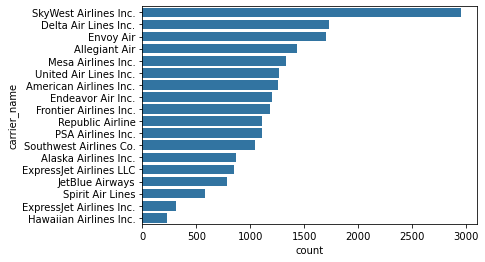

In [17]:
carrier_name_order = df.carrier_name.value_counts().index
sns.countplot(y=df.carrier_name, color=sns_color, order=carrier_name_order);

SkyWest Airlins Inc. have almost the double of the records when compared with the second place. I will preservate this order of the carrier_name in the next related graphs.

In [18]:
# top_20_airports = df.airport_name.value_counts().iloc[:20]
# sns.countplot(y=df.airport_name, color=sns_color, order=top_20_airports.index);

In [19]:
# plt.figure(figsize=(13, 3))

# plt.subplot(1, 3, 1)
# sns.histplot(x=df.arr_cancelled, bins=calculate_log_bins(df.arr_cancelled, 0.2));
# plt.xscale('log')

# plt.subplot(1, 3, 2)
# sns.histplot(x=df.arr_diverted, bins=calculate_log_bins(df.arr_diverted, 0.2));
# plt.xscale('log')

# plt.subplot(1, 3, 3)
# sns.histplot(x=df.arr_delay, bins=calculate_log_bins(df.arr_delay, 0.2));
# plt.xscale('log');

# plt.tight_layout()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The total of delayed flights had a long tail, so I have used a logarthm scale to take a better look in the distribution. The main cause of delay is usually due to a previous flight using the same aircraft being late, while delay caused by security problems is very uncommon.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The dataset was very clean. During the initial wrangling I could already detect and fix some problems in the data.

## Bivariate Exploration

Let's check the relation between delays and months.

In [20]:
# data = df.groupby('month').sum()
# data.div(data.arr_flights, axis='index')


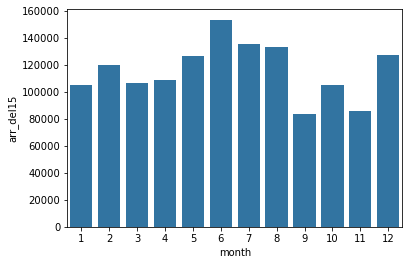

In [21]:
data = df.groupby('month').sum().arr_del15.reset_index()
sns.barplot(x=data.month, y=data.arr_del15, color=sns_color);

Let's plot the proportion of fligths that has been delayed by month to verify if the total of flights by month can inteferr in the results. 

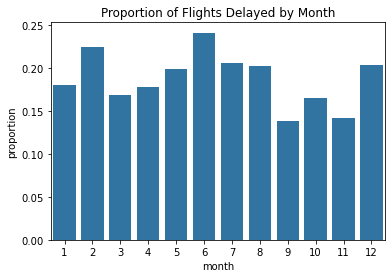

In [22]:
data = df.groupby('month').sum()
data = (data.arr_del15 / data.arr_flights).reset_index().rename(columns={0: 'proportion'})
sns.barplot(x=data.month, y=data.proportion, color=sns_color);
plt.title('Proportion of Flights Delayed by Month');

We can see that June is the month with has the most delays while setember has the least.

Let's check the distribution of delays between the carriers (the order is the same from the univariate graph).

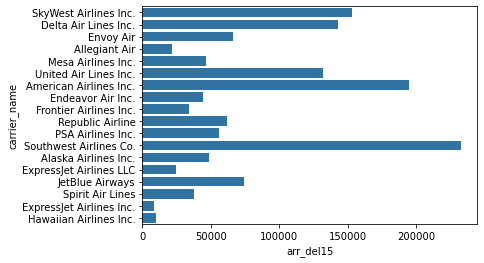

In [23]:
data = df.groupby('carrier_name').sum().arr_del15.reset_index()
sns.barplot(y=data.carrier_name, x=data.arr_del15, color=sns_color, order=carrier_name_order);

We can see that Southwest has a significant difference in the total of delays when compared with others companies. 

Let's plot the proportion of flights delayed to see if there is some impact in the results.

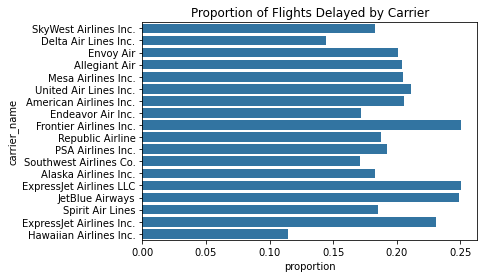

In [24]:
data = df.groupby('carrier_name').sum()
data = (data.arr_del15 / data.arr_flights).reset_index().rename(columns={0: 'proportion'})
sns.barplot(y=data.carrier_name, x=data.proportion, color=sns_color, order=carrier_name_order);
plt.title('Proportion of Flights Delayed by Carrier');

When compared with the proportion of flights delayed, the SouthWest values are very lower, showing that they do more fligths than other companies. In this scenario, Frontier, ExpressJet and JetBlue are the companies who lead the proportion of fligths delayed while Hawaiian and Delta has the lowest.

In [25]:
# univariate barplot with count of total flight vs delayed flight (agrupado por mes)
# data = df[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']].sum().reset_index().rename(columns={0: 'count'})
# data

In [26]:
# df.groupby('airport_name').arr_del15.sum().sort_values(ascending=False).iloc[:20]

In [27]:
# data = df.groupby('month').sum()[['arr_flights', 'arr_del15']]
# data = data.reset_index().melt(id_vars=['month'], var_name='total', value_name='sum')

# sns.barplot(data=data, x='month', y='sum', hue='total');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I could see that June is the month with has the most delays while setember has the least. Besides, Frontier, ExpressJet and JetBlue are the companies who lead the proportion of fligths delayed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Only looking to the total of flights delayed can lead to incorrect statements. A better information is use the proportion of delayed flights that smooth this values.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Let's start plotting the sum of delayed flights divided by month and carrier.

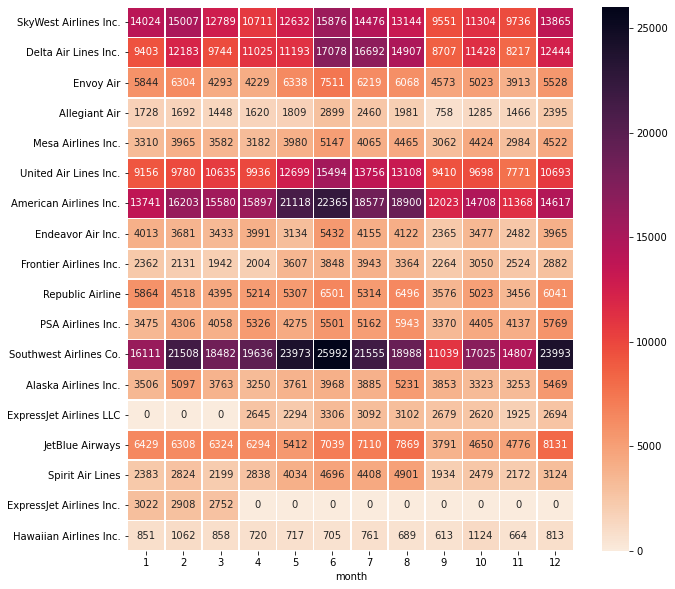

In [28]:
data = df.groupby(['month', 'carrier_name']).sum().arr_del15
data = data.reset_index().pivot(index='carrier_name', columns='month', values='arr_del15')
data = data.fillna(0).reindex(carrier_name_order).astype(int)

plt.figure(figsize=(10,10))
sns.heatmap(data, cmap='rocket_r', annot=True, fmt="d", linewidths=.5);

There is a interesting information here. Expressjet Airlines Inc. changed it's name to Expressjet Airlines LLC in april. So let's fix this data and plot again.

In [29]:
df.replace('ExpressJet Airlines Inc.', 'ExpressJet Airlines LLC', inplace=True)
carrier_name_order = carrier_name_order.drop(['ExpressJet Airlines Inc.'])

df.carrier_name.unique()

<StringArray>
[              'Envoy Air',        'Spirit Air Lines',
       'PSA Airlines Inc.',   'SkyWest Airlines Inc.',
   'United Air Lines Inc.',  'Southwest Airlines Co.',
      'Mesa Airlines Inc.',        'Republic Airline',
       'Endeavor Air Inc.',  'American Airlines Inc.',
    'Alaska Airlines Inc.',         'JetBlue Airways',
    'Delta Air Lines Inc.', 'ExpressJet Airlines LLC',
  'Frontier Airlines Inc.',           'Allegiant Air',
  'Hawaiian Airlines Inc.']
Length: 17, dtype: string

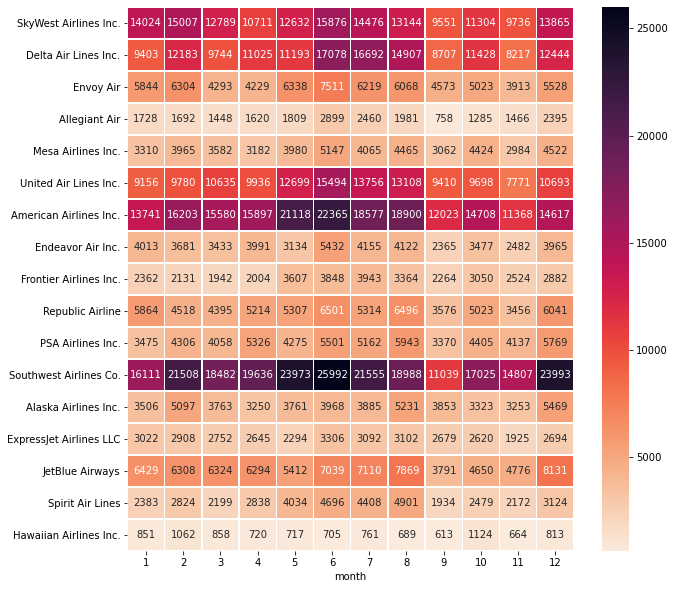

In [30]:
data = df.groupby(['carrier_name', 'month']).sum().arr_del15
data = data.reset_index().pivot(index='carrier_name', columns='month', values='arr_del15')
data = data.fillna(0).reindex(carrier_name_order).astype(int)

plt.figure(figsize=(10,10))
sns.heatmap(data, cmap='rocket_r', annot=True, fmt="d", linewidths=.5);

Now our color bar is more significant. Let's plot the proportions to smooth the data.

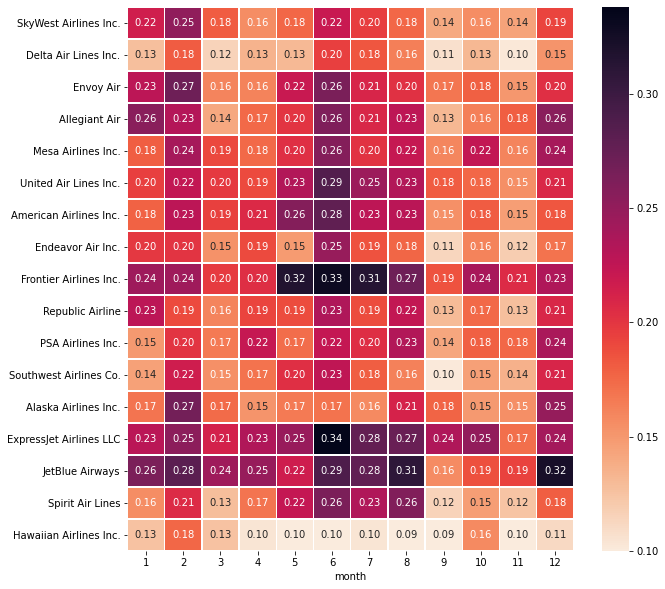

In [31]:
data = df.groupby(['carrier_name', 'month']).sum()
data = data.arr_del15 / data.arr_flights
data = data.reset_index().rename(columns={0: 'proportion'})
data = data.pivot(index='carrier_name', columns='month', values='proportion')
data = data.reindex(carrier_name_order).fillna(0).astype(float)

plt.figure(figsize=(10,10))
sns.heatmap(data, cmap='rocket_r', annot=True, fmt=".2f", linewidths=.5, vmin=0.1);

Here we can see that Hawaiian Airlines have a very conscient and low proportion of delayed flights during all year, while other companies (like Endeavor Air) have very discrepating proportion of delayed fligths. 

Let's take a closer look in the cause of these delays

In [32]:
# data = df.groupby(['carrier_name', 'month']).sum()
# data = data[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].div(data.arr_del15, axis='index')
# data

# figs, axes = plt.subplots(ncols=2, nrows=9, constrained_layout=True, figsize=(15,25))
# for i, (index, row) in enumerate(data.groupby(level=0)):
#     x = int(i / 2) % 9
#     y = i % 2
#     ax = axes[x, y]
#     row.loc[index].plot(kind='bar', ax=ax, stacked=True)
#     h, l = ax.get_legend_handles_labels()
#     ax.legend().remove()
#     ax.set_title(index)

# figs.legend(h, l, bbox_to_anchor=(1.1, 0.98));
# plt.suptitle('teste');

/home/gilvan.reis/anaconda3/envs/py3_env/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/gilvan.reis/anaconda3/envs/py3_env/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


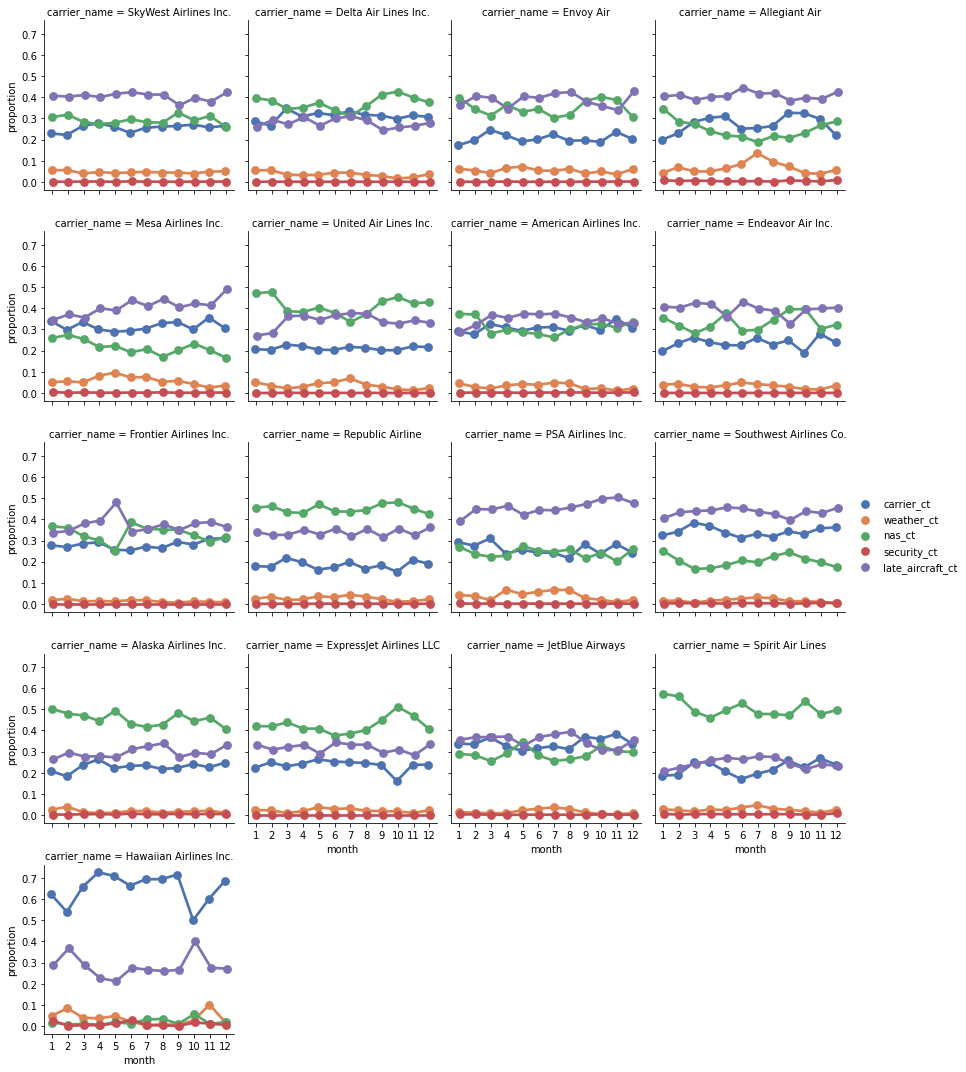

In [33]:
data = df.groupby(['carrier_name', 'month']).sum()
data = data[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].div(data.arr_del15, axis='index')
data = data.reset_index()
data = pd.melt(data, id_vars=['month', 'carrier_name'], var_name='cause', value_name='proportion')

g = sns.FacetGrid(data, col='carrier_name', col_wrap=4, col_order=carrier_name_order);
g.map(sns.pointplot, 'month', 'proportion', 'cause', palette='deep', dodge=True);
g.add_legend();

Here we can see some interesting information:

6 of the 17 carrier in the dataset have the main cause of delay due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control) during all the year, that are condition out of control of the carrier.

Even if Hawaiian Airlines has the lowest percentage of delayed flights, the main cause of they delay are problems related to the carrier, indicating that they operation should be improved.

Let's compare the percentage of delayed flights due to carrier problems

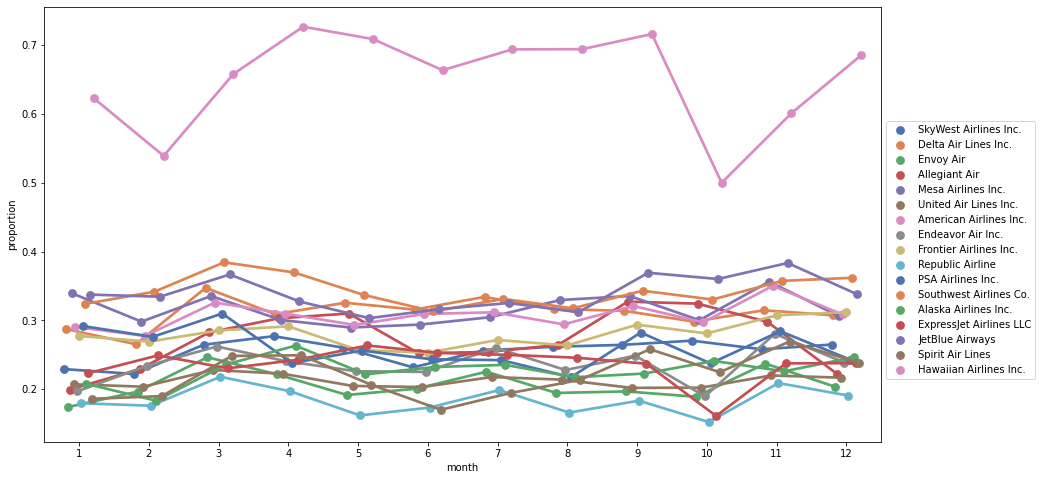

In [34]:
data = df.groupby(['carrier_name', 'month']).sum()
data = data.carrier_ct.div(data.arr_del15, axis='index')
data = data.reset_index().rename(columns={0: 'proportion'})

plt.figure(figsize=(15,8))
# , join=False
ax = sns.pointplot(data=data, x='month', y='proportion', hue='carrier_name', dodge=True, hue_order=carrier_name_order, palette='deep');
plt.legend(bbox_to_anchor=(1, 0.75));

We can se a huge difference when comparing Hawaiian Airlines with the others carrier.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

Export cleaned data to be used in the presentation

In [44]:
df.to_csv('data/2019_airline_delay_causes_cleaned.csv', index=False)

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!